<h2>Goal:</h2>
Write functions to subdivide an m/z : rt space into rt bins. See how this affects classification performance

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

Start with MTBLS315, the malaria vs fever dataset. Could get ~0.85 AUC for whole dataset.

In [2]:
# Get the data
### Subdivide the data into a feature table
local_path = '/home/irockafe/Dropbox (MIT)/Alm_Lab/projects/'
data_path = local_path + '/revo_healthcare/data/processed/MTBLS315/'\
'uhplc_pos/xcms_camera_results.csv'

## Import the data and remove extraneous columns
df = pd.read_csv(data_path, index_col=0)
df.shape
df.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,uhplc_pos,X1001_P,X1002_P,...,X1061_P,X1062_P,X1064_P,X1065_P,X1066_P,X1067_P,X1068_P,isotopes,adduct,pcgroup
1,101.007967,101.007588,101.008130,477.241992,471.100983,482.391502,60,45,3.616371e+06,2.320645e+06,...,1.983560e+06,2.093216e+06,2.527164e+06,4.152718e+06,1.825209e+06,7.822549e+06,2.834007e+06,NaN,NaN,787
2,101.007960,101.007536,101.008126,509.986330,500.880896,520.388235,95,45,2.940994e+06,2.441040e+06,...,3.192053e+05,5.701592e+06,2.609743e+06,3.565382e+06,5.586252e+06,2.073465e+06,2.709955e+06,NaN,NaN,32
3,101.007948,101.007487,101.010717,579.362840,571.827328,594.855131,80,38,2.348349e+06,2.438837e+06,...,6.770040e+06,6.708048e+06,6.388253e+06,6.758188e+06,2.203079e+04,7.496131e+06,7.420543e+06,NaN,[M+H]+ 100.001,16
4,101.007952,101.007544,101.010260,539.117660,533.111561,544.196241,49,39,3.529820e+06,4.696406e+06,...,6.462975e+06,2.408258e+06,2.492477e+06,2.376000e+04,2.590596e+06,2.746123e+06,2.658940e+06,NaN,NaN,715
5,101.008000,101.007595,101.008126,411.702145,406.439061,417.429376,58,41,7.313490e+06,3.702172e+06,...,2.641742e+06,5.048564e+06,3.306844e+06,4.773233e+05,4.864746e+06,1.753600e+06,3.490942e+06,NaN,[M+Na]+ 78.0186 [M+H]+ 100.001,25


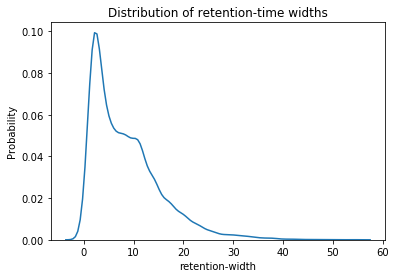

In [3]:
# Show me a distribution of retention time widths
rt_width = df['rtmax']-df['rtmin']
#sns.violinplot(rt_width, inner='box')
#sns.rugplot(rt_width)
rt_width.shape
sns.kdeplot(rt_width, kernel='gau')
plt.ylabel('Probability')
plt.xlabel('retention-width')
plt.title('Distribution of retention-time widths')

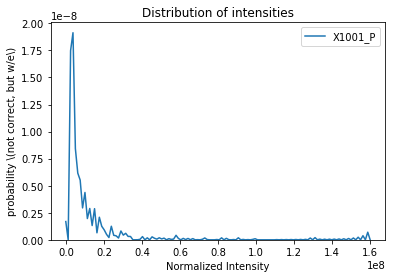

In [4]:
# Show me a distribution of intensity values
intensities = df['X1001_P'] 
normalized_intensities = df['X1001_P'].div(df['X1001_P'].max())

#sns.kdeplot(df['X1001_P'])
sns.kdeplot(intensities)
plt.xlabel("Normalized Intensity")
plt.ylabel('probability \(not correct, but w/e\)')
plt.title('Distribution of intensities')

Almost everything is below 30sec rt-window

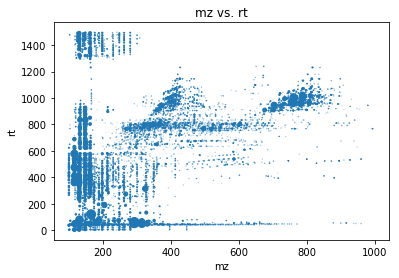

In [5]:
# Show me a scatterplot of m/z rt dots
# distribution along mass-axis and rt axist

plt.scatter(df['mz'], df['rt'], s=normalized_intensities*100,)
plt.xlabel('mz')
plt.ylabel('rt')
plt.title('mz vs. rt')
plt.show()



1496.9643125
994.676397959
ymin:  51.0079310886


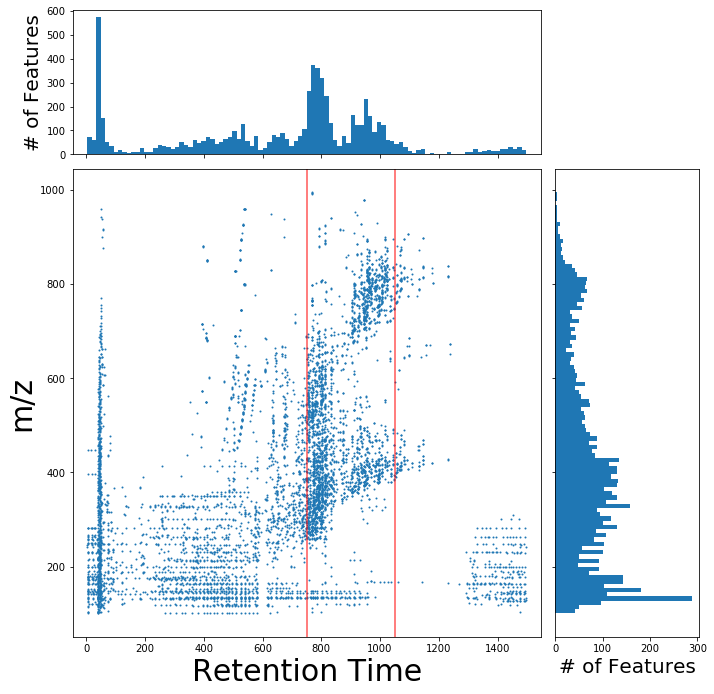

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

def plot_mz_rt(df, path, rt_bounds):
    # the random data
    x = df['rt']
    y = df['mz']
    print np.max(x)
    print np.max(y)
    nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    #fig = plt.figure(1, figsize=(8, 8))
    fig = plt.figure(1, figsize=(10,10))
    
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    axScatter.scatter(x, y, s=1)

    # now determine nice limits by hand:
    binwidth = 0.25

    #xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])

    #lim = (int(xymax/binwidth) + 1) * binwidth

    x_min = np.min(x)-50
    x_max = np.max(x)+50
    axScatter.set_xlim(x_min, x_max )
    y_min = np.min(y)-50
    y_max = np.max(y)+50
    axScatter.set_ylim(y_min, y_max)

    # Add vertical red line between 750-1050 retention time
    '''
    plt.plot([0,1], [0,1], linestyle = '--', lw=2, color='r',
                        label='Luck', alpha=0.5)
    '''
    print 'ymin: ', y_min
    # Add vertical/horizontal lines to scatter and histograms
    axScatter.axvline(x=rt_bounds[0], lw=2, color='r', alpha=0.5)
    axScatter.axvline(x=rt_bounds[1], lw=2, color='r', alpha=0.5)

    #axHistx.axvline(x=rt_bounds[0], lw=2, color='r', alpha=0.5)
    #axHistx.axvline(x=rt_bounds[1], lw=2, color='r', alpha=0.5)

    #bins = np.arange(-lim, lim + binwidth, binwidth)
    bins = 100
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    axScatter.set_ylabel('m/z', fontsize=30)
    axScatter.set_xlabel('Retention Time', fontsize=30)

    axHistx.set_ylabel('# of Features', fontsize=20)
    axHisty.set_xlabel('# of Features', fontsize=20)
        
    plt.savefig(path, 
                format='pdf')
    plt.show()

my_path = '/home/irockafe/Dropbox (MIT)/'\
    'Alm_Lab/projects/revo_healthcare/'\
    'presentations/eric_bose/poop.pdf'
plot_mz_rt(df, my_path, (750, 1050))

In [7]:
print 'Maximum retention time', x_max

Maximum retention time

NameError: name 'x_max' is not defined

In [9]:
# divide feature table into slices of retention time
def get_rt_slice(df, rt_bounds):
    '''
    PURPOSE: 
        Given a tidy feature table with 'mz' and 'rt' column headers, 
        retain only the features whose rt is between rt_left 
        and rt_right
    INPUT: 
        df - a tidy pandas dataframe with 'mz' and 'rt' column 
            headers
        rt_left, rt_right: the boundaries of your rt_slice, in seconds
    '''
    out_df = df.loc[ (df['rt'] > rt_bounds[0]) & 
                    (df['rt'] < rt_bounds[1])]
    return out_df

def sliding_window_rt(df, rt_width, step=rt_width*0.25):
    # get range of values [(0, rt_width)
    #get_rt_slice(df, )
    rt_min = np.min(df['rt'])
    rt_max = np.max(df['rt'])
    # define the ranges 
    left_bound = np.arange(rt_min, rt_max, step)
    right_bound = left_bound + rt_width
    rt_bounds = zip(left_bound, right_bound)
    for rt_slice in rt_bounds:
        rt_window = get_rt_slice(df, rt_slice)
        #print rt_window.head()
        print 'shape', rt_window.shape
        raise hee
        # TODO Send to ml pipeline here? Or separate function?


print type(np.float64(3.5137499999999999))
a = get_rt_slice(df, (750, 1050))
print 'Original dataframe shape: ', df.shape
print '\n Shape:', a.shape, '\n\n\n\n'
print df
sliding_window_rt(df, 100)

<type 'numpy.float64'>
Original dataframe shape:  (6675, 72)

 Shape: (3195, 72) 




              mz       mzmin       mzmax           rt        rtmin  \
1     101.007967  101.007588  101.008130   477.241992   471.100983   
2     101.007960  101.007536  101.008126   509.986330   500.880896   
3     101.007948  101.007487  101.010717   579.362840   571.827328   
4     101.007952  101.007544  101.010260   539.117660   533.111561   
5     101.008000  101.007595  101.008126   411.702145   406.439061   
6     101.007963  101.007655  101.008132   486.946938   483.042062   
7     101.007989  101.007578  101.008125   433.778248   426.773497   
8     101.007931  101.007531  101.008101   526.740008   521.635717   
9     101.007985  101.007530  101.010084   463.303450   456.600177   
10    101.007978  101.007589  101.010255   399.319980   394.199341   
11    101.007994  101.007612  101.010549   421.996123   417.773384   
12    101.008019  101.007366  101.010589   359.978944   350.202853   
13  

TypeError: cannot convert the series to <type 'float'>

In [16]:
# Convert selected slice to feature table, X, get labels y

,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,uhplc_pos,X1001_P,X1002_P,...,X1061_P,X1062_P,X1064_P,X1065_P,X1066_P,X1067_P,X1068_P,isotopes,adduct,pcgroup
37,104.106489,104.106064,104.106715,769.177526,768.010462,778.193106,67,55,329070.128055,396227.894115,...,473247.278829,588871.216421,426270.960560,572473.584864,569940.613228,315394.476526,944484.900497,NaN,NaN,442
38,104.106481,104.105924,104.106715,797.843875,796.921036,799.168518,53,51,65338.750793,79133.729755,...,185880.697595,128276.011237,205495.778470,231927.971052,210661.425303,164378.532642,274995.481829,NaN,NaN,33
44,112.627395,112.626903,112.627604,768.882724,768.164720,769.627506,34,34,0.000000,2512.603634,...,17939.896362,19085.291535,24771.295474,34058.985162,59346.107589,43265.770580,90047.112008,NaN,NaN,11
87,117.988387,117.987919,117.988599,912.162783,903.569648,919.857546,58,34,316999.738260,557646.282622,...,413286.737731,392384.888350,969722.728147,241978.478925,401799.805418,402536.825821,387827.492260,NaN,NaN,968
92,117.988391,117.987949,117.988588,895.832264,889.220909,902.494494,49,32,443674.518761,360580.907258,...,278985.527029,296287.274749,274575.084114,255087.820263,248857.829020,274409.550916,243281.723691,NaN,NaN,57


<h2> Show me the distribution of features from alzheimers dataset </h2>

In [88]:
### Subdivide the data into a feature table
local_path = '/home/irockafe/Dropbox (MIT)/Alm_Lab/'\
'projects'
data_path = local_path + '/revo_healthcare/data/processed/MTBLS72/positive_mode/'\
'mtbls_no_retcor_bw2.csv'
## Import the data and remove extraneous columns
df = pd.read_csv(data_path, index_col=0)
df.shape
df.head()
# Make a new index of mz:rt
mz = df.loc[:,"mz"].astype('str')
rt = df.loc[:,"rt"].astype('str')
idx = mz+':'+rt
df.index = idx
df.head()

a = get_rt_slice(df, (0,100))
print df.shape
print a.shape

(1417, 262)
(517, 262)


661.766511
661.766511
998.775098907
ymin:  34.9598918644


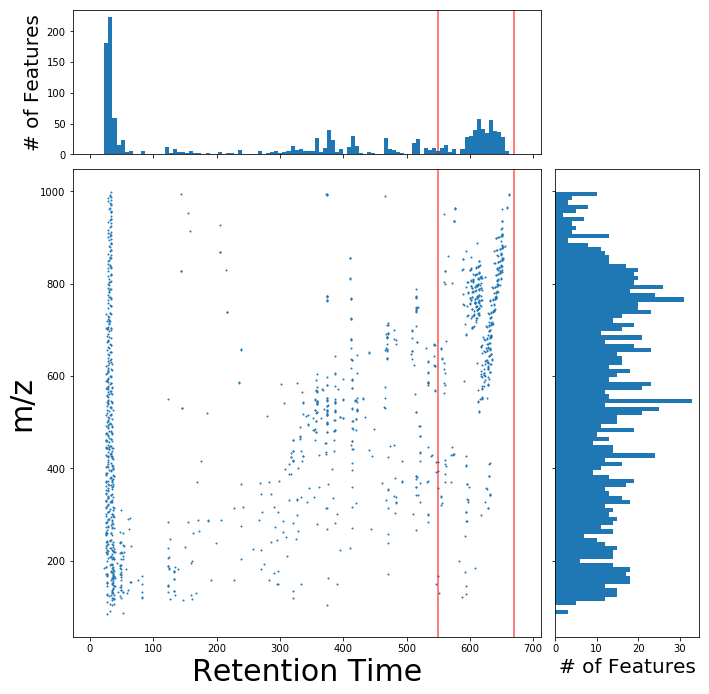

In [81]:
my_path = '/home/irockafe/Dropbox (MIT)/'\
    'Alm_Lab/projects/revo_healthcare/'\
    'presentations/eric_bose/alzheimers_mz_rt_scatter.pdf'
print np.max(df['rt'])
plot_mz_rt(df, my_path, (550, 670))

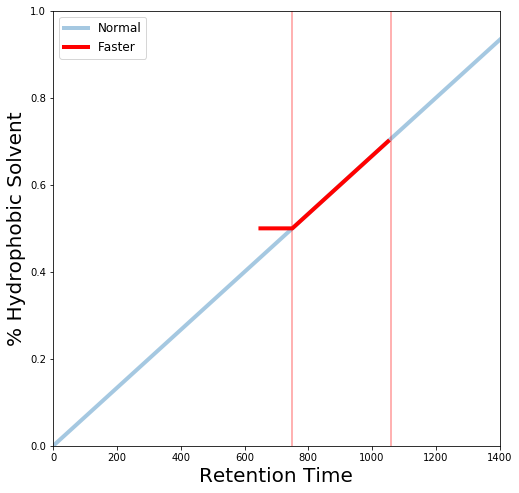

In [78]:
# Make chromatography gradient images
fig = plt.figure(1, figsize=(8,8))
    
#axScatter = plt.axes()
plt.plot([0,1500], [0, 1], lw=4, label='Normal',
        alpha=0.4)
#plt.xlim([0, 30])
#plt.ylim([0,1])
plt.ylabel("% Hydrophobic Solvent", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.plot([650, 750, 1050], [750.0/1500, 750.0/1500, 1050.0/1500], 
         lw=4, color='r', label='Faster')
plt.xlim([0, 1400])
plt.ylim([0,1])
plt.ylabel("% Hydrophobic Solvent", fontsize=20)
plt.xlabel('Retention Time', fontsize=20)
plt.legend(fontsize=12)
plt.axvline(x=750, lw=2, color='r', alpha=0.3)
plt.axvline(x=1060, lw=2, color='r',alpha=0.3)
plt.savefig('/home/irockafe/Dropbox (MIT)/Alm_Lab/projects/revo_healthcare/presentations/eric_bose/gradient_example.pdf')
plt.show()


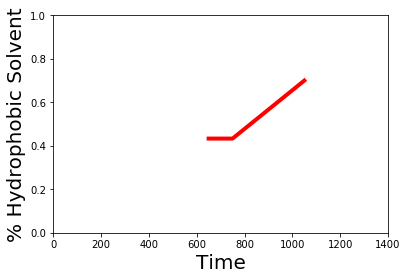

In [54]:
# Make chromatography gradient images
fig = plt.figure()
    
#axScatter = plt.axes()
